# Data Preprocessing and Feature Engineering

In [64]:
#import the instant libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [65]:
#Import the dataset
raw_data = pd.read_csv("loan.csv")

In [66]:
#Display the first five data  rows
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Exploring the loan data

In [67]:
#Display the shape of the dataframe
raw_data.shape

(20000, 142)

In [68]:
#Explore the data types of the columns
raw_data.dtypes

id                       float64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv            int64
                          ...   
settlement_status        float64
settlement_date          float64
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 142, dtype: object

In [69]:
#Explore the particluar column data frame
raw_data['loan_amnt'].describe()

count    20000.000000
mean     16111.383750
std      10369.193761
min       1000.000000
25%       8000.000000
50%      14000.000000
75%      22000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

## Removing irrelevant columns

In [70]:
raw_data= raw_data.drop(['zip_code', 'policy_code', 'application_type', 'last_credit_pull_d',
'verification_status', 'pymnt_plan', 'funded_amnt_inv', 'sub_grade', 'out_prncp',
'out_prncp_inv', 'total_pymnt_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
'last_pymnt_amnt', 'initial_list_status'], axis =1)

In [71]:
raw_data.shape

(20000, 122)

## Dealing with missing values

In [72]:
col_num=0
TotalObjects = raw_data.shape[0]
print ("Column\t\t\t\t\t Null Values%")
for x in raw_data:
    nullCount = raw_data[x].isnull().sum();
    nullPercent = nullCount*100 / (TotalObjects)
    if nullCount > 0 and nullPercent > 20 :
        col_num=col_num+1
        raw_data.drop(x, axis=1,inplace=True)
        print(str(x)+"\t\t\t\t\t"+str(nullPercent))
print ("A total of "+str(col_num)+" deleted !")

Column					 Null Values%
id					100.0
member_id					100.0
url					100.0
desc					100.0
mths_since_last_delinq					56.375
mths_since_last_record					88.41
mths_since_last_major_derog					77.47
annual_inc_joint					87.845
dti_joint					87.845
verification_status_joint					89.17
mths_since_recent_bc_dlq					80.36
mths_since_recent_revol_delinq					71.3
revol_bal_joint					87.845
sec_app_earliest_cr_line					87.845
sec_app_inq_last_6mths					87.845
sec_app_mort_acc					87.845
sec_app_open_acc					87.845
sec_app_revol_util					88.0
sec_app_open_act_il					87.845
sec_app_num_rev_accts					87.845
sec_app_chargeoff_within_12_mths					87.845
sec_app_collections_12_mths_ex_med					87.845
sec_app_mths_since_last_major_derog					96.295
hardship_type					100.0
hardship_reason					100.0
hardship_status					100.0
deferral_term					100.0
hardship_amount					100.0
hardship_start_date					100.0
hardship_end_date					100.0
payment_plan_start_date					100.0
hardship_length					100.0
hardship_dpd					100.0

In [73]:
raw_data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,36 months,13.56,84.92,C,Chef,10+ years,RENT,55000.0,...,0.0,1,0,60124,16901,36500,18124,N,Cash,N
1,30000,30000,60 months,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,90000.0,...,0.0,1,0,372872,99468,15000,94072,N,Cash,N
2,5000,5000,36 months,17.97,180.69,D,Administrative,6 years,MORTGAGE,59280.0,...,0.0,0,0,136927,11749,13800,10000,N,Cash,N
3,4000,4000,36 months,18.94,146.51,D,IT Supervisor,10+ years,MORTGAGE,92000.0,...,100.0,0,0,385183,36151,5000,44984,N,Cash,N
4,30000,30000,60 months,16.14,731.78,C,Mechanic,10+ years,MORTGAGE,57250.0,...,0.0,0,0,157548,29674,9300,32332,N,Cash,N


In [74]:
raw_data['emp_title'].isnull().sum()

3319

In [75]:
#Replace the missing values
raw_data['emp_title'].fillna('Unknown',inplace = True)

In [76]:
raw_data['emp_title'].isnull().sum()

0

In [77]:
raw_data['dti'].isnull().sum()

43

In [78]:
raw_data['dti'].fillna(0,inplace=True)

In [79]:
raw_data['dti'].isnull().sum()

0

In [80]:
#Replace the mean values for null columns
raw_data['revol_util'].fillna(raw_data['revol_util'].mean(),inplace = True)

## Formatting data

In [81]:
# Observe the content of the column
pd.unique(raw_data['emp_length'].values)

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [82]:
raw_data['emp_length'].fillna(0,inplace=True)

In [83]:
def CalculateEmployeeLength(year):
    if year == '< 1 year':
        return 0.5
    elif year == '10+ years':
        return 10
    else:
        yr=str(year)
        return yr.rstrip(' years')

In [84]:
raw_data['emp_length']=raw_data['emp_length'].apply(CalculateEmployeeLength)

In [85]:
pd.unique(raw_data['emp_length'].values)

array([10, '6', '4', 0.5, '2', '9', '0', '5', '3', '7', '1', '8'],
      dtype=object)

## Visualizing data

In [86]:
pd.unique(raw_data['loan_amnt'].values)

array([ 2500, 30000,  5000,  4000,  5550,  2000,  6000,  5500, 28000,
       11200,  6500, 22000,  3500,  7000, 25000, 16000, 13000, 10000,
        9600, 15000, 23000,  8000, 32075, 12000,  3300, 20000,  2200,
        1250, 10400,  7500,  9000, 40000, 14400, 22400, 26000,  1000,
       29450, 34625, 31450, 15500, 36000,  3000, 35000, 26500, 10250,
       27000, 24000, 21000,  3775,  5600,  8500, 22650, 11000, 18000,
        5525,  2525, 32000, 18500,  1500,  8800, 10500,  8250,  3600,
       10450, 17100, 10475, 15400, 16800,  4500, 14000, 29625,  7075,
        5400, 20400,  8425, 16500, 34575,  1200,  4800,  7200, 27975,
        6600, 20300,  5100,  6025, 21600, 17425,  1300, 32500,  8400,
       36950, 31200, 30800, 11500, 31000,  1600, 14425, 36425, 12500,
       15600, 19200,  9375,  2700, 15450, 20500, 19000, 34800, 20075,
       19375, 22500, 38000,  3125, 11025, 18400, 22950,  7150, 27200,
       27500,  7800, 14225,  3200,  9500,  6200, 17000, 12950, 30500,
        9900, 39500,

In [88]:
def CalculateLoanRanges(value):
    if value <= 5000:
        return '5K and Below'
    if value > 5000 and value <= 10000:
        return '5K-10K'
    if value > 10000 and value <= 15000:
        return '10K-15K'
    if value > 15000 and value <= 20000:
        return '15K-20K'
    if value > 20000 and value <= 25000:
        return '20K-25K'
    if value > 25000 and value <= 30000:
        return '25K-30K'
    if value > 30000 :
        return '30K and Above'
    return 'Other'

loan_ranges = raw_data['loan_amnt'].apply(CalculateLoanRanges)

In [89]:
loan_ranges.value_counts()

5K-10K           5063
10K-15K          3472
15K-20K          3118
5K and Below     2898
30K and Above    2268
20K-25K          1834
25K-30K          1347
Name: loan_amnt, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Loan Amount')

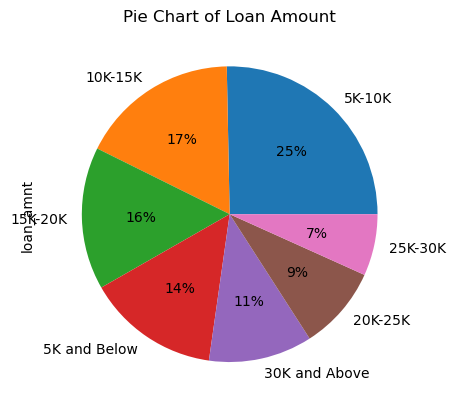

In [90]:
f = plt.figure()
loan_ranges.value_counts().plot.pie(autopct='%1.0f%%',)
plt.title('Pie Chart of Loan Amount')

<AxesSubplot:>

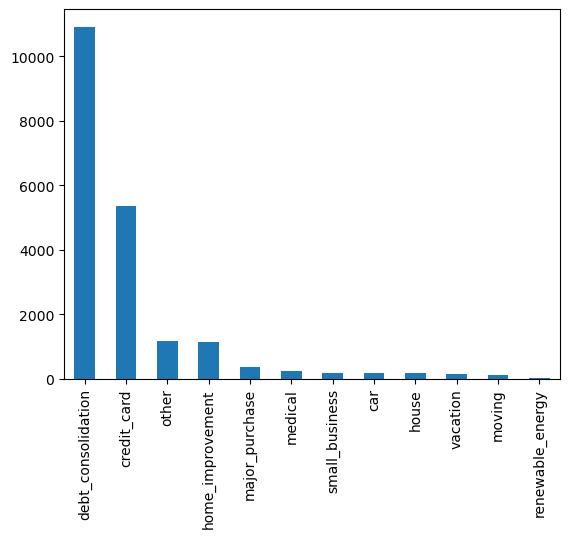

In [91]:
pur = raw_data['purpose'].value_counts()
pur.plot(kind='bar')

In [92]:
raw_data.to_csv('cleaned_loans2007.csv', index=False,encoding='utf-8')